# HW4
By ShineHale(yunsong Yang) U202115980

This part we are for solving some data analysis and processing, first of all the work, we need to import the related library in order to support out homework architecture.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import scipy.io
import math
import statsmodels.api as sm
from sklearn.cluster import KMeans
%matplotlib inline

## Experiment 1

- The test scores of 60 students in a certain school are as follows:

    93 75 83 93 91 85 84 82 77 76 77 95 94 89 91 88 86 83 96 81 79 97 78 75 67 69 68 84 83 81 75 66 85 70 94 84 83 82 80 78 74 73 76 70 86 76 90 89 71 66 86 73 80 94 79 78 77 63 53 55

1. Calculate the mean, standard deviation, range, skewness, kurtosis, and draw a histogram; 
2. test the normality of the distribution
3. If the test fits a normal distribution, estimate the parameters of the normal distribution and test the parameters

Ex1:
means:  80.1 standard:  9.711 range:  44
skewness:  -0.48 kurtness:  0.274


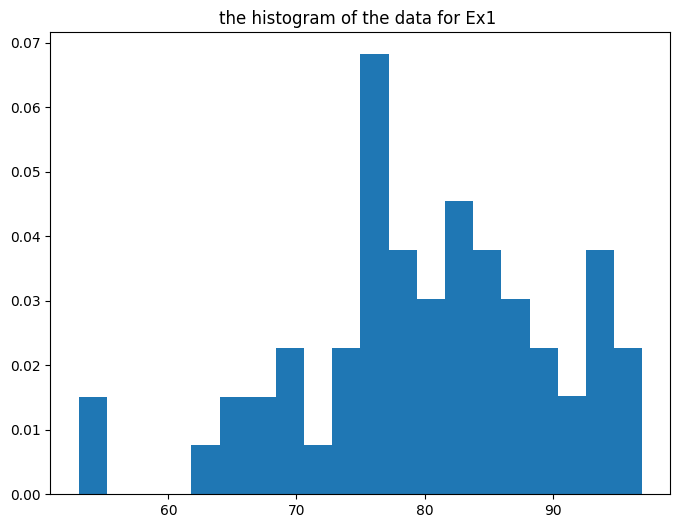

In [2]:
dataEx1 = pd.Series([93, 75, 83, 93, 91, 85, 84, 82, 77, 76, 77, 95, 94, 89, 91, 88, 86, 83, 96, 81, 79, 97,
                     78, 75, 67, 69, 68, 84, 83, 81, 75, 66, 85, 70, 94, 84, 83, 82, 80, 78, 74, 73, 76, 70, 
                     86, 76, 90, 89, 71, 66, 86, 73, 80, 94, 79, 78, 77, 63, 53, 55])
meansEx1 = dataEx1.mean()
stdEx1 = dataEx1.std()
rangeEx1 = dataEx1.max() - dataEx1.min()
skewEx1 = dataEx1.skew()
kurtEx1 = dataEx1.kurt()

print('Ex1:')
print('means: ', meansEx1, 'standard: ', round(stdEx1, 3), 'range: ', rangeEx1)
print('skewness: ', round(skewEx1, 3), 'kurtness: ', round(kurtEx1, 3))

plt.figure(figsize = (8,6))
plt.title('the histogram of the data for Ex1 ')
plt.hist(x = dataEx1, bins = 20, density=True)

plt.show()

In [3]:
stat, p = st.shapiro(dataEx1)

print('Shapiro-Wilk outcome is:')
print('statistic:', stat)
print('p:', p)

if p > 0.05:
    print('The value of p is bigger than 0.05, which means the data follows normal distribution')
else:
    print('The value of p is less than 0.05, which means the data does not follow normal distribution')

Shapiro-Wilk outcome is:
statistic: 0.9741901159286499
p: 0.23275624215602875
The value of p is bigger than 0.05, which means the data follows normal distribution


From the output answer, we can have the view that **the data follows the normal distribution**, so we need to calculate the normal distribution parameters:

In [4]:
muEx1_pre = np.mean(dataEx1)
varEx1_pre = np.var(dataEx1, ddof=1)
sigmaEx1_pre = np.sqrt(varEx1_pre)
print('mu for prediction: ', muEx1_pre)
print('sigma for predition: ', sigmaEx1_pre)


mu for prediction:  80.1
sigma for predition:  9.710556897224652


## Experiment 2

A scholar conducted a study to verify the claim that the price of gasoline in a certain area is 115 cents per gallon. He randomly selected some gas stations and collected data for January and February of a certain year. The data is as follows:

- January: 119 117 115 116 112 121 115 122 116 118 109 112 119 112 117 113 114 109 109 118
- February: 118 119 115 122 118 121 120 122 128 116 120 123 121 119 117 119 128 126 118 125

1)Use the data from both months to verify the reliability of this claim.

2)Provide the confidence intervals for the gasoline prices in January and February respectively.

3)Provide the confidence interval for the difference in gasoline prices between January and February.

Since we do not know the standard error of the distribution of the datas, so we only need to use the T test for the prediction

In [5]:
dataEx2_Jan = np.array([119, 117, 115, 116, 112, 121, 115, 122, 116, 118, 109, 112, 119, 112, 117, 113, 114, 109, 109, 118])
dataEx2_Feb = np.array([118, 119, 115, 122, 118, 121, 120, 122, 128, 116, 120, 123, 121, 119, 117, 119, 128, 126, 118, 125])

mu0 = 115
Alpha = 0.05

t_Jan, p_Jan = st.ttest_1samp(dataEx2_Jan, mu0)
t_Feb, p_Feb = st.ttest_1samp(dataEx2_Feb, mu0)


if p_Jan > Alpha:
    print('the average price in the January is 115 cents')
else:
    print('the average price in the January is not 115 cents')
if p_Feb > Alpha:
    print('the average price in the February is 115 cents')
else:
    print('the average price in the February is not 115 cents')
       

the average price in the January is 115 cents
the average price in the February is not 115 cents


From the price in the January and Febrary, we can confirm that the view **the price of local gasoline is 115 is right in the January while in the Febrary maybe wrong.**

we can calculate the confidence interval in the January and February as follows, we let the $Alpha = 0.05$ and then solve the problem

In [6]:
n_Jan = len(dataEx2_Jan)
x_bar_Jan = np.mean(dataEx2_Jan)
s_Jan = np.std(dataEx2_Jan, ddof=1)
se_Jan = s_Jan / np.sqrt(n_Jan)

alpha = 0.05
t_critical = st.t.ppf(1 - alpha / 2, df=n_Jan-1)
lower_ci = x_bar_Jan - t_critical * se_Jan
upper_ci = x_bar_Jan + t_critical * se_Jan

print('the bar of the price in the January is ', x_bar_Jan)
print('the confidence interval of the price in January is:')
print(round(lower_ci, 4),'-----', round(upper_ci,4))


n_Feb = len(dataEx2_Feb)
x_bar_Feb = np.mean(dataEx2_Feb)
s_Feb = np.std(dataEx2_Feb, ddof=1)
se_Feb = s_Feb / np.sqrt(n_Feb)

alpha = 0.05
t_critical = st.t.ppf(1 - alpha / 2, df=n_Feb-1)
lower_ci = x_bar_Feb - t_critical * se_Feb
upper_ci = x_bar_Feb + t_critical * se_Feb

print('the bar of the price in the February is ', x_bar_Feb)
print('the confidence interval of the price in February is:')
print(round(lower_ci, 4),'-----', round(upper_ci,4))



the bar of the price in the January is  115.15
the confidence interval of the price in January is:
113.3388 ----- 116.9612
the bar of the price in the February is  120.75
the confidence interval of the price in February is:
119.0129 ----- 122.4871


From the datas in the January and February, we can easily calculate the confidence interval of the difference of the January and February.

In [7]:
data_diff = dataEx2_Feb - dataEx2_Jan

n_data_Diff = len(data_diff)
x_bar_diff = np.mean(data_diff)
s_diff = np.std(data_diff, ddof=1)
se_diff= s_diff / np.sqrt(n_data_Diff)

alpha = 0.05
t_critical = st.t.ppf(1 - alpha / 2, df=n_data_Diff-1)
lower_ci = x_bar_diff - t_critical * se_Jan
upper_ci = x_bar_diff + t_critical * se_Jan

print('the bar of the difference between the January and the February is ', x_bar_diff)
print('the confidence interval of the difference between the January and the February is:')
print(round(lower_ci, 5),'-----', round(upper_ci,5))


the bar of the difference between the January and the February is  5.6
the confidence interval of the difference between the January and the February is:
3.78882 ----- 7.41118


From the codes and output above, we can have the conclusion:
1. **the confidence interval of price in the January is $[113.3388, 116.9612]$**
2. **the confidence interval of price in the February is $[119.0129, 122.4871]$**
3. **the confidence interval of the difference between the January and the February is $[3.78882, 7.41118]$**

## Experiment 3

Investigate the influence of temperature x on the yield y of an agricultural product, and measure the following 10 sets of data:

温度（℃） | 20 | 25 | 30 | 35 | 40 | 45 | 50 | 55 | 60 | 65
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
产量（kg） | 13.2 | 15.1 | 16.4 | 17.1 | 17.9 | 18.7 | 19.6 | 21.2 | 22.5 | 24.3


- Find the linear regression equation of y with respect to x, test whether the regression effect is significant, and predict x=42℃ 
- Estimation and prediction interval of hourly production (95% confidence level).

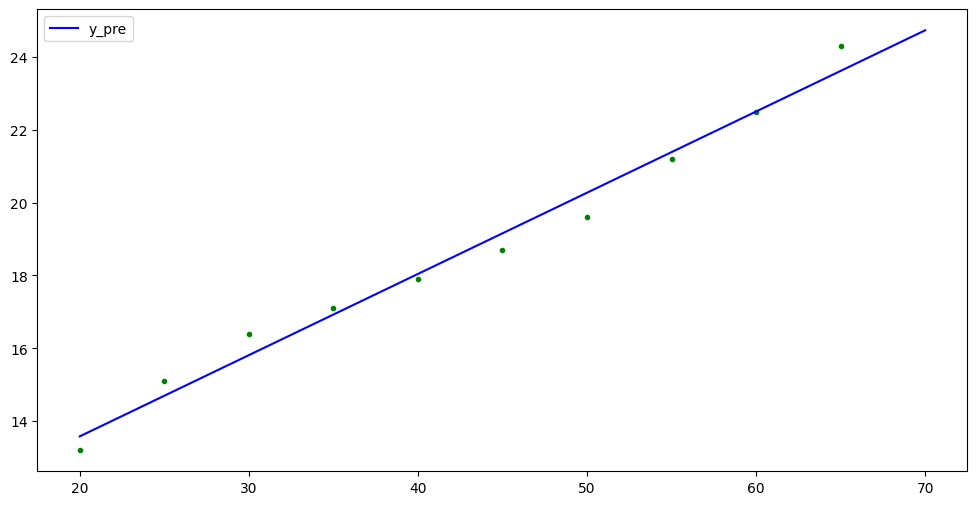

the function is y = 0.223 x + 9.121
the predict value is 18.4885
the confidence interval is 17.3203 -- 19.6566 when x is 42


In [8]:
tem = np.arange(20, 70, 5)
yie = np.array([13.2, 15.1, 16.4, 17.1, 17.9,
                18.7, 19.6, 21.2, 22.5, 24.3])

x_bar = np.mean(tem)
y_bar = np.mean(yie)
x_square = np.average(tem * tem)
y_square = np.average(yie * yie)
xy_ave = np.average(tem * yie)

beta1 = (xy_ave - x_bar * y_bar) / (x_square - x_bar * x_bar)
beta0 = y_bar - beta1 * x_bar 

x_pre = np.linspace(20, 70, 100)
y_pre = x_pre * beta1 + beta0
yie_pre = tem * beta1 + beta0

x_new = 42
y_new = beta1 * x_new + beta0

plt.figure(figsize=(12, 6))
plt.scatter(x=tem, y=yie, c='g', marker='.') 
plt.plot(x_pre, y_pre, c='b', label='y_pre')
plt.legend()
plt.show()

print('the function is y = %.3f x + %.3f'%(beta1, beta0))
print('the predict value is %.4f'%(y_new))

n = len(tem)
alpha = 0.05
s = math.sqrt(np.sum((yie_pre - yie) * (yie_pre - yie)) / (n - 2))
s_x = math.sqrt(np.sum((tem - x_bar) ** 2) / (n - 1))
t_alpha = st.t.ppf(1-alpha/2, n-2)
delta = t_alpha * s * np.sqrt(1 + 1/n + (x_new - x_bar)**2 / ((n-1) * s_x**2))
lower, upper = y_new - delta, y_new + delta

print('the confidence interval is %.4f -- %.4f when x is 42'%(lower, upper))

From the codes, we can have the conclusion as follow:

the equation of linear regression is:
$$
    \hat{y} = 0.223 x + 9.121
$$
when $$ x=42 $$
the  yield is $$ y = 18.4885$$ 
and its confidence interval is 
$$[17.3203, 19.6566]$$ 

In [9]:
y_detec = yie - beta1 * tem
t, p = st.ttest_1samp(y_detec, 9.121)
if p > 0.05:
    print('the prediction is very significant')
else:
    print('th prediction is not very significant')

the prediction is very significant


From the value of p, we can have the conclusion is that the prediction is very significant, it can show the property of the datas efficient!

## Experiment 4

The compressive strength of concrete increases with the prolongation of curing time, a batch of concrete is now made into 12 test blocks, record the data of curing date x (day) and compressive strength y (kg/cm2):

| 养护时间 x | 2  | 3  | 4  | 5  | 7  | 9  | 12 | 14 | 17 | 21 | 28 | 56 |
|------------|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|
| 抗压强度 y | 35 | 42 | 47 | 53 | 59 | 65 | 68 | 73 | 76 | 82 | 86 | 99 |

试求$\hat{y} = a + b ln(x)$ 型回归方程。


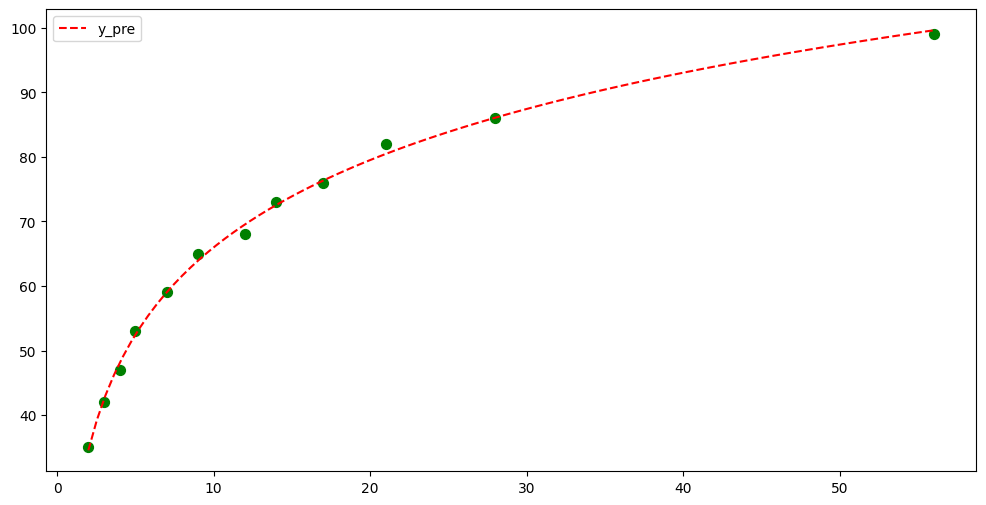

the function is y = 19.529 lnx + 21.006


In [10]:
time = np.array([2, 3, 4, 5, 7, 9,
                 12, 14, 17, 21, 28, 56])
force = np.array([35, 42, 47, 53, 59, 65,
                 68, 73, 76, 82, 86, 99])
lnx = np.log(time)

x_bar = np.mean(lnx)
y_bar = np.mean(force)
x_square = np.average(lnx * lnx)
y_square = np.average(force * force)
xy_ave = np.average(lnx * force)

b = (xy_ave - x_bar * y_bar) / (x_square - x_bar * x_bar)
a = y_bar - b * x_bar 

x_pre = np.linspace(2, 56, 100)
y_pre = np.log(x_pre) * b + a

plt.figure(figsize=(12, 6))
plt.scatter(x=time, y=force, c='g', s=200, marker='.') 
plt.plot(x_pre, y_pre, c='r', linestyle='dashed', label='y_pre')
plt.legend()
plt.show()

print('the function is y = %.3f lnx + %.3f'%(b, a))

From the figure and the output, we can have the conclusion is:
$$
\hat{y} = 21.006 + 19.529lnx
$$
and from the figure,we can find it is right!

## Experiment 5

First of all, we need to import the data in the mat file into the python envionment, and then transmit them into the variable in the `pandas datframe` and then solve the problem using the circular cluster analysis

First of all, show the data distribution

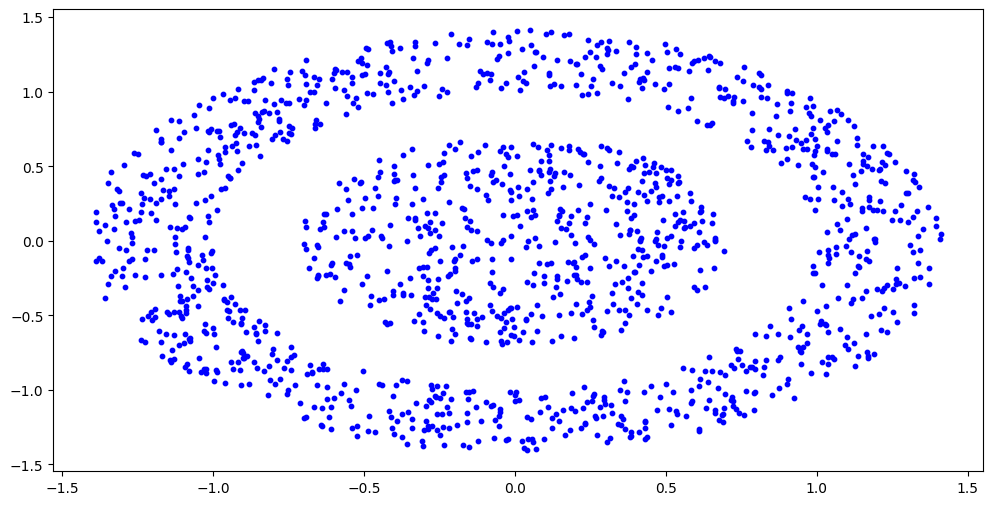

In [11]:
# import the mat file
mat = scipy.io.loadmat('L6data.mat')

df = pd.DataFrame(mat['X'])
df['x'] = df[0]
df['y'] = df[1]
plt.figure(figsize=(12, 6))
plt.scatter(x=df['x'], y=df['y'], s=40, c='b', marker='.')
plt.show()

solve the problem using the library `Kmeans` and then plot the figure after we have finished the cluster

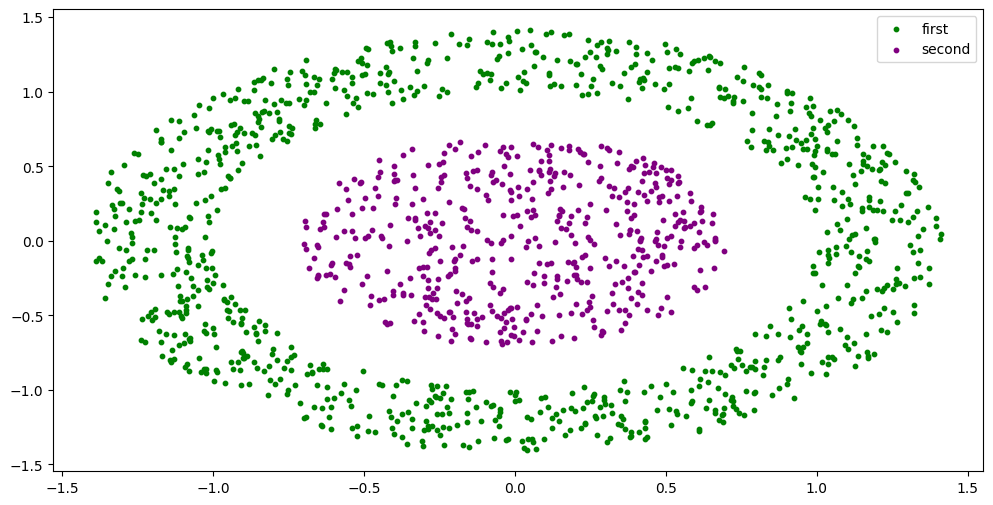

In [12]:
center = np.array([np.average(df['x']), np.average(df['y'])])
distances_to_center = np.linalg.norm(df[['x', 'y']] - center, axis=1)
distances_to_center = distances_to_center.reshape(-1, 1)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(distances_to_center)
df['label'] = kmeans.labels_

plt.figure(figsize=(12, 6))
plt.scatter(x=df[df['label']==0]['x'], y=df[df['label']==0]['y'], c='green', s=40, marker='.', label='first')
plt.scatter(x=df[df['label']==1]['x'], y=df[df['label']==1]['y'], c='purple', s=40, marker='.', label='second')
plt.legend()
plt.show()

At this point, we have finished all the homework in the HW4.
